<a href="https://colab.research.google.com/github/EBHAVANI17/VISION_AI_STUDIO/blob/main/IMAGE_SEGMENTATION_AND_CAPTIONING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

IMG_DIR = "/content/drive/MyDrive/COCO DATASET (1)/val2017/val2017"
CAPTIONS_JSON = "/content/drive/MyDrive/COCO DATASET (1)/annotations/captions_val2017.json/captions_val2017.json"
INSTANCES_JSON = "/content/drive/MyDrive/COCO DATASET (1)/annotations/captions_val2017.json/instances_val2017.json/instances_val2017.json"

Mounted at /content/drive


In [4]:
!pip install transformers torchvision torch matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

loading annotations into memory...
Done (t=1.61s)
creating index...
index created!


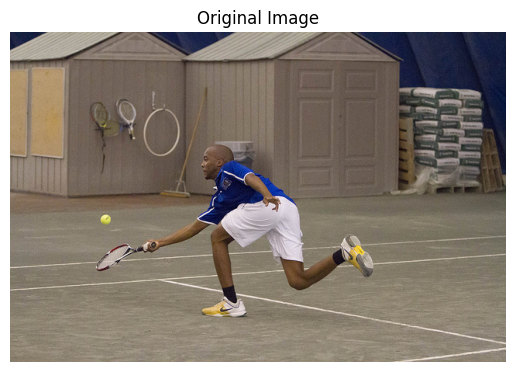

📂 Image ID: 431693
📜 Human Captions:
1. there is a male tennis player trying to hit the ball
2. A person on a court with a tennis racket.
3. A man hitting a tennis ball with a racquet.
4. A man swinging a tennis racquet at a ball on a court.
5. A black man running towards the tennis ball with his racket.


In [5]:
from pycocotools.coco import COCO
import os, cv2, random
import matplotlib.pyplot as plt
from PIL import Image

coco_caps = COCO(CAPTIONS_JSON)

img_id = random.choice(coco_caps.getImgIds())

img_info = coco_caps.loadImgs(img_id)[0]
img_path = os.path.join(IMG_DIR, img_info['file_name'])

img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {img_path}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

ann_ids = coco_caps.getAnnIds(imgIds=img_id)
anns = coco_caps.loadAnns(ann_ids)
print(f"📂 Image ID: {img_id}")
print("📜 Human Captions:")
for i, ann in enumerate(anns):
    print(f"{i+1}. {ann['caption']}")



In [6]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)



Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [7]:
from torchvision import models, transforms

from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights

weights = DeepLabV3_ResNet50_Weights.DEFAULT
seg_model = models.segmentation.deeplabv3_resnet50(weights=weights).eval()


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth

  0%|          | 0.00/161M [00:00<?, ?B/s]
  0%|          | 768k/161M [00:00<00:21, 7.69MB/s]
  2%|▏         | 3.75M/161M [00:00<00:07, 21.4MB/s]
  6%|▌         | 9.12M/161M [00:00<00:04, 37.1MB/s]
  9%|▉         | 14.8M/161M [00:00<00:03, 44.1MB/s]
 13%|█▎        | 21.4M/161M [00:00<00:02, 53.0MB/s]
 17%|█▋        | 27.8M/161M [00:00<00:02, 56.2MB/s]
 21%|██        | 33.1M/161M [00:00<00:02, 54.1MB/s]
 24%|██▍       | 39.0M/161M [00:00<00:02, 55.9MB/s]
 29%|██▊       | 45.8M/161M [00:00<00:02, 60.1MB/s]
 32%|███▏      | 52.0M/161M [00:01<00:01, 60.9MB/s]
 36%|███▌      | 57.9M/161M [00:01<00:01, 56.0MB/s]
 39%|███▉      | 63.4M/161M [00:01<00:01, 54.4MB/s]
 43%|████▎     | 69.1M/161M [00:01<00:01, 55.8MB/s]
 47%|████▋     | 74.8M/161M [00:01<00:01, 56.6MB/s]
 51%|█████     | 81.1M/161M [00:01<00:01, 58.3MB/s]
 55%|█████▍   

In [8]:
VOC_LABELS = {
    0: "background", 1: "aeroplane", 2: "bicycle", 3: "bird", 4: "boat", 5: "bottle",
    6: "bus", 7: "car", 8: "cat", 9: "chair", 10: "cow", 11: "diningtable", 12: "dog",
    13: "horse", 14: "motorbike", 15: "person", 16: "potted plant", 17: "sheep",
    18: "sofa", 19: "train", 20: "tvmonitor"
}


In [9]:
def analyze_image(img_path, coco_caps, caption_model, caption_processor, seg_model, voc_labels):
    import os, cv2
    import torch
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    from torchvision import transforms
    import seaborn as sns

    # Load and convert image
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Image not found: {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img).convert("RGB")

    # Generate Caption
    inputs = caption_processor(images=pil_img, return_tensors="pt").to(caption_model.device)
    output = caption_model.generate(**inputs)
    caption = caption_processor.decode(output[0], skip_special_tokens=True)

    # Segment Image
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = transform(pil_img).unsqueeze(0)
    with torch.no_grad():
        seg_output = seg_model(input_tensor)['out'][0]
    segmentation = seg_output.argmax(0)

    # Show Image + Segmentation
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(pil_img)
    plt.axis('off')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(segmentation.cpu(), cmap='tab20b')
    plt.axis('off')
    plt.title("Segmentation Mask")
    plt.suptitle(f"📜 Caption: {caption}", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Pixel Count Bar Plot
    unique_classes, counts = np.unique(segmentation.numpy(), return_counts=True)
    plt.figure(figsize=(12, 4))
    sns.barplot(x=unique_classes, y=counts, palette="viridis")
    plt.xlabel("Class Label ID")
    plt.ylabel("Pixel Count")
    plt.title("Detected Segmentation Classes (by pixel area)")
    plt.show()

    # Print Labels
    print("🧠 Classes present in the image:")
    for cls_id in unique_classes:
        if cls_id in voc_labels:
            pixel_count = counts[np.where(unique_classes == cls_id)][0]
            print(f" - {voc_labels[cls_id]} (Label {cls_id}, Pixels: {pixel_count})")

    print("🎯 Top object in segmentation:", voc_labels.get(int(unique_classes[np.argmax(counts)]), "unknown"))
    print("🔍 Caption from BLIP:", caption)

    return caption


/tmp/ipython-input-9-696283699.py:44: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


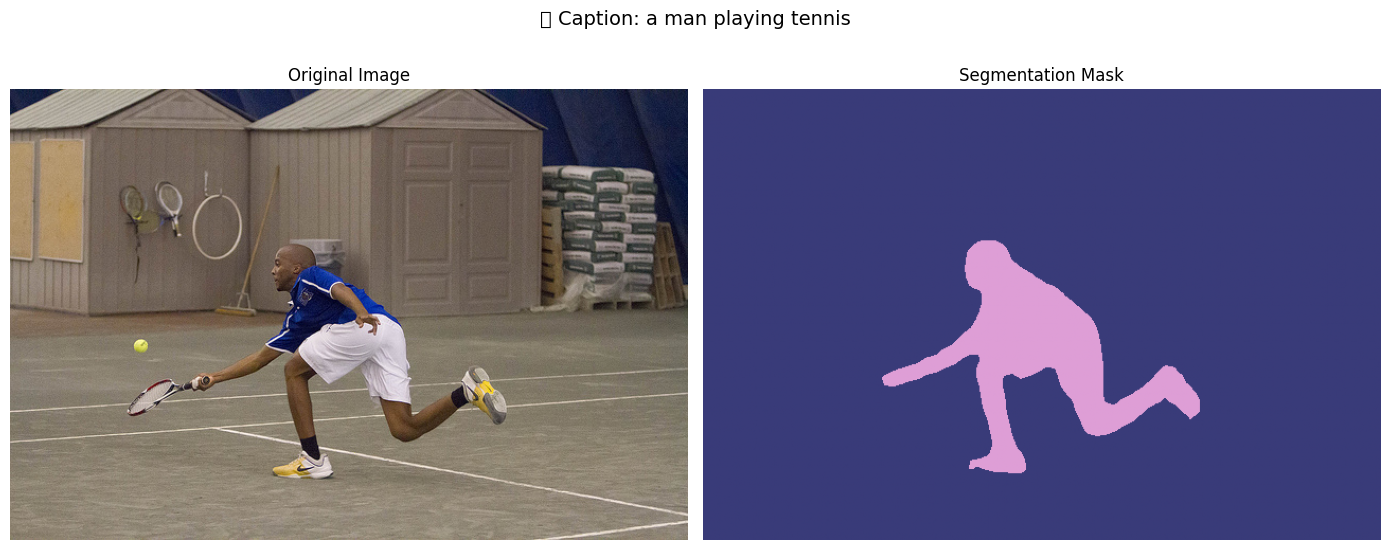

/tmp/ipython-input-9-696283699.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette="viridis")


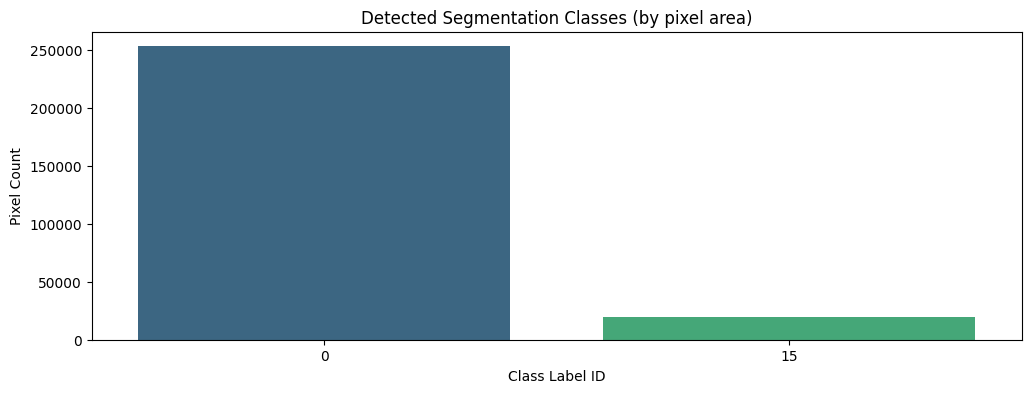

🧠 Classes present in the image:
 - background (Label 0, Pixels: 253332)
 - person (Label 15, Pixels: 19308)
🎯 Top object in segmentation: background
🔍 Caption from BLIP: a man playing tennis


In [10]:

# Call the function
caption_result = analyze_image(
    img_path=img_path,
    coco_caps=coco_caps,
    caption_model=caption_model,
    caption_processor=processor,
    seg_model=seg_model,
    voc_labels=VOC_LABELS
)



🔎 Analyzing Image ID: 74092


/tmp/ipython-input-9-696283699.py:44: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


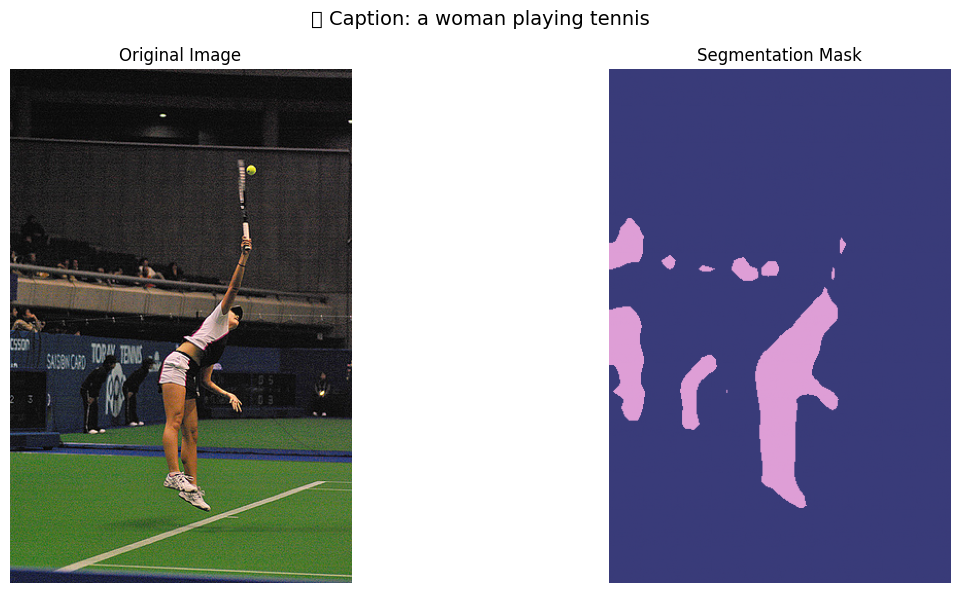

/tmp/ipython-input-9-696283699.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette="viridis")


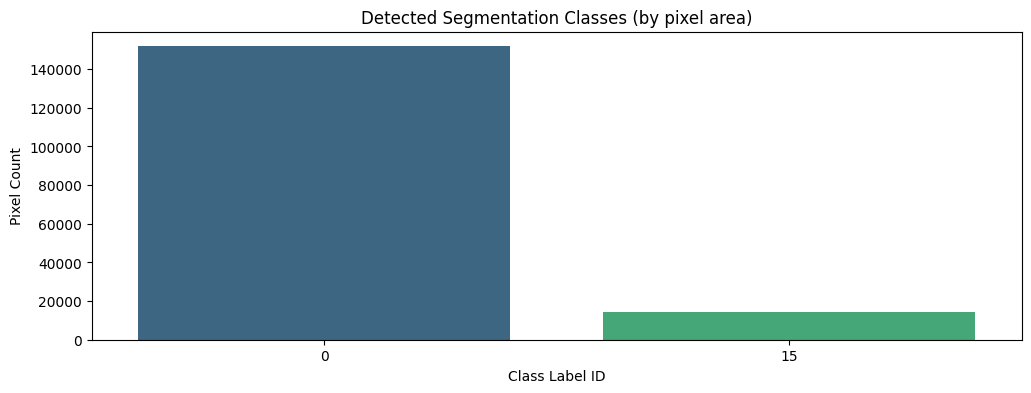

🧠 Classes present in the image:
 - background (Label 0, Pixels: 151801)
 - person (Label 15, Pixels: 14199)
🎯 Top object in segmentation: background
🔍 Caption from BLIP: a woman playing tennis

🔎 Analyzing Image ID: 318238


/tmp/ipython-input-9-696283699.py:44: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


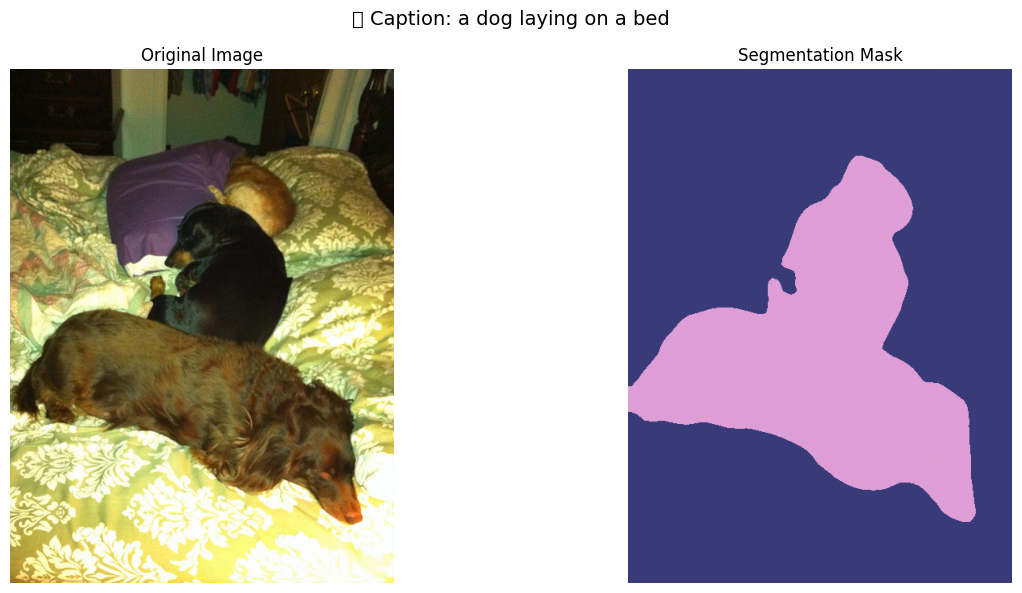

/tmp/ipython-input-9-696283699.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette="viridis")


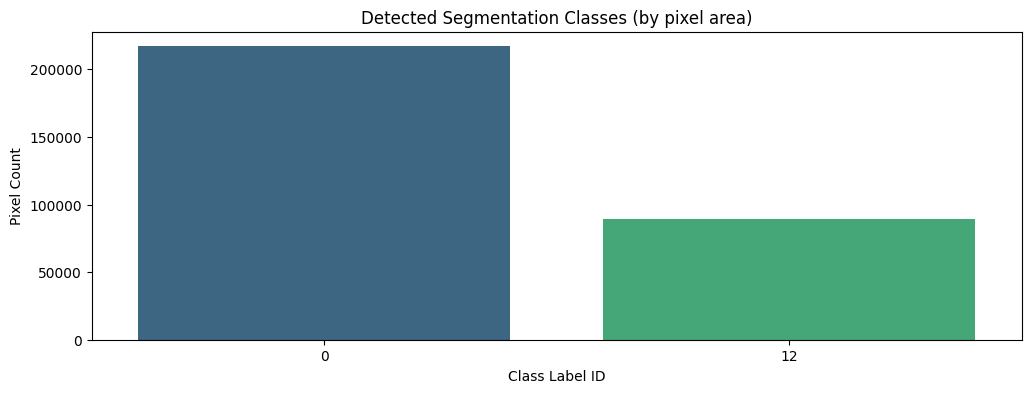

🧠 Classes present in the image:
 - background (Label 0, Pixels: 216954)
 - dog (Label 12, Pixels: 88966)
🎯 Top object in segmentation: background
🔍 Caption from BLIP: a dog laying on a bed

🔎 Analyzing Image ID: 305695


/tmp/ipython-input-9-696283699.py:44: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128220 (\N{SCROLL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


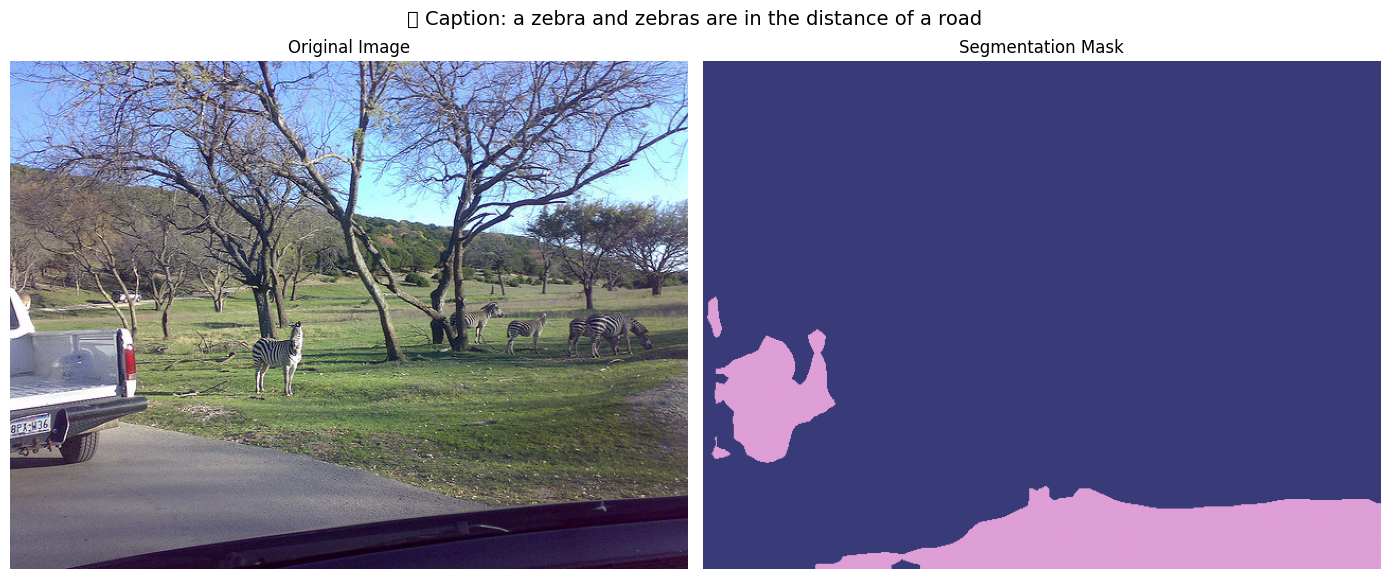

/tmp/ipython-input-9-696283699.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette="viridis")


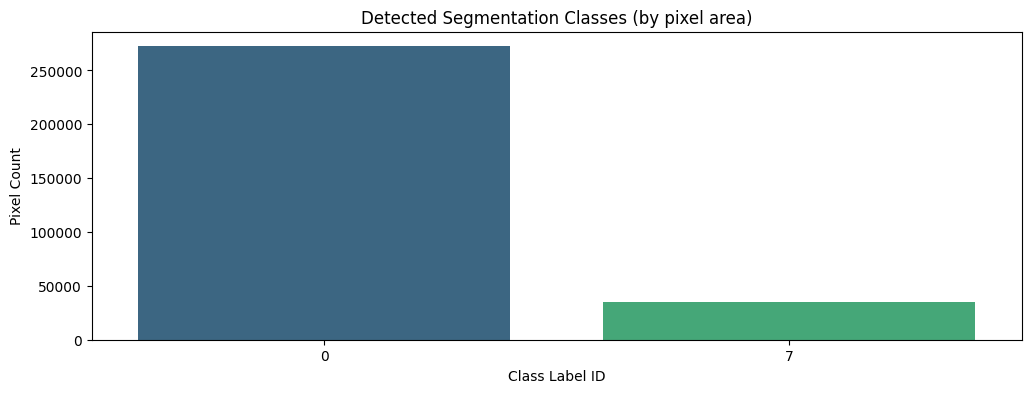

🧠 Classes present in the image:
 - background (Label 0, Pixels: 272387)
 - car (Label 7, Pixels: 34813)
🎯 Top object in segmentation: background
🔍 Caption from BLIP: a zebra and zebras are in the distance of a road


In [11]:
img_ids = coco_caps.getImgIds()
for img_id in random.sample(img_ids, 3):  # Pick 3 random images
    img_info = coco_caps.loadImgs(img_id)[0]
    path = os.path.join(IMG_DIR, img_info['file_name'])
    print(f"\n🔎 Analyzing Image ID: {img_id}")
    analyze_image(path, coco_caps, caption_model, processor, seg_model, VOC_LABELS)


In [12]:
!pip install -q streamlit pyngrok transformers torchvision torch opencv-python matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.6 MB/s eta 0:00:00


In [13]:
app_code = """
import streamlit as st
import torch
import numpy as np
from PIL import Image
import pandas as pd
import cv2
from torchvision import models, transforms
from torchvision.models.segmentation import DeepLabV3_ResNet50_Weights
from transformers import BlipProcessor, BlipForConditionalGeneration

# ---------------- GLOBAL STYLE ----------------
st.set_page_config(page_title="🧠 Vision AI Studio", layout="wide")

st.markdown(\"\"\"
<link href="https://fonts.googleapis.com/css2?family=Poppins&display=swap" rel="stylesheet">
<style>
    html, body, [class*="css"] {
        font-family: 'Poppins', sans-serif;
        background-color: #f9fafb;
    }
    .block-container {
        padding-top: 2rem;
        padding-bottom: 2rem;
    }
    .sidebar .sidebar-content {
        background-color: #f0f4f8;
        border-radius: 12px;
        padding: 1rem;
    }
    .sidebar h4 {
        margin-bottom: 0.5rem;
        color: #222222;
    }
    .sidebar ul {
        padding-left: 1.2rem;
        margin-top: 0.5rem;
    }
    .sidebar li {
        margin: 0.4rem 0;
    }
</style>
\"\"\", unsafe_allow_html=True)

# ---------------- HEADER ----------------
st.title("🖼️ Vision AI Studio")
st.caption("🤖 AI-powered Image Captioning + Segmentation Web App")

# ---------------- LOAD MODELS ----------------
@st.cache_resource
def load_models():
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cpu").eval()
    seg_model = models.segmentation.deeplabv3_resnet50(weights=DeepLabV3_ResNet50_Weights.DEFAULT).eval()
    return processor, caption_model, seg_model

processor, caption_model, seg_model = load_models()

VOC_LABELS = {
    0: "background", 1: "aeroplane", 2: "bicycle", 3: "bird", 4: "boat", 5: "bottle",
    6: "bus", 7: "car", 8: "cat", 9: "chair", 10: "cow", 11: "diningtable", 12: "dog",
    13: "horse", 14: "motorbike", 15: "person", 16: "potted plant", 17: "sheep",
    18: "sofa", 19: "train", 20: "tvmonitor"
}

# ---------------- ANALYSIS FUNCTION ----------------
def analyze(image_pil):
    image_np = np.array(image_pil.convert("RGB"))

    # Captioning
    inputs = processor(images=image_pil, return_tensors="pt")
    output = caption_model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)

    # Segmentation
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
    ])
    tensor = transform(image_pil).unsqueeze(0)
    with torch.no_grad():
        out = seg_model(tensor)['out'][0]
    mask = out.argmax(0).numpy()

    # Pixel count stats
    classes, counts = np.unique(mask, return_counts=True)
    data = [{"Label": VOC_LABELS.get(int(c), "unknown"), "Pixels": int(p)} for c, p in zip(classes, counts) if c in VOC_LABELS]
    df = pd.DataFrame(data).sort_values("Pixels", ascending=False)

    # Overlay
    mask_overlay = np.zeros_like(image_np)
    mask_overlay[:, :, 1] = cv2.resize(mask, (image_np.shape[1], image_np.shape[0]))
    mask_overlay = (mask_overlay / mask_overlay.max() * 255).astype(np.uint8)
    overlay = cv2.addWeighted(image_np, 0.7, mask_overlay, 0.3, 0)

    dominant = df.iloc[0]["Label"] if not df.empty else "unknown"

    return caption, overlay, df, dominant

# ---------------- SIDEBAR ----------------
with st.sidebar:
    st.markdown(\"\"\"
    <div class="sidebar-content">
        <h4>📁 Upload Image</h4>
        <p>Select a file in JPG or PNG format.</p>
        <ul>
            <li>📸 JPG / JPEG</li>
            <li>🖼️ PNG</li>
        </ul>
        <hr style="margin-top:1rem; margin-bottom:1rem;">
        <h4>🧠 What You'll Get</h4>
        <ul>
            <li>📝 AI-generated Caption</li>
            <li>🎨 Semantic Segmentation Overlay</li>
            <li>📊 Class-wise Pixel Statistics</li>
        </ul>
    </div>
    \"\"\", unsafe_allow_html=True)

    uploaded = st.file_uploader("Upload here", type=["jpg", "jpeg", "png"])

# ---------------- MAIN APP ----------------
if uploaded:
    image = Image.open(uploaded)

    st.subheader("📊 Results Overview")

    col1, col2 = st.columns(2)

    with col1:
        st.image(image, caption="Uploaded Image", use_column_width=True)

    with st.spinner("Processing image with AI..."):
        caption, overlay, stats_df, dominant = analyze(image)

    with col2:
        st.image(overlay, caption="Segmentation Overlay", use_column_width=True)

    st.success(f"📜 **Caption**: {caption}")
    st.info(f"🏆 **Dominant Object**: `{dominant}`")

    st.markdown("### 📊 Pixel Class Distribution")
    st.dataframe(stats_df.reset_index(drop=True), use_container_width=True)
else:
    st.info("📂 Please upload an image from the sidebar to begin.")
"""
with open("app.py", "w") as f:
    f.write(app_code)


In [14]:
!ngrok config add-authtoken 2zlqGZOeoetw5MKfbaS87izpHM9_4RMnNs8sqv8dVSy7vf5dZ

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [15]:
# Re-run your previous code to start ngrok and streamlit
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print("Streamlit app is live at:", public_url)

!streamlit run app.py &> logs.txt &


Streamlit app is live at: NgrokTunnel: "https://01e8468fce2b.ngrok-free.app" -> "http://localhost:8501"


In [46]:
%cd /content
!rm -rf VISION_AI_STUDIO


/content


In [47]:
from getpass import getpass
token = getpass('Enter your GitHub token: ')


Enter your GitHub token: ··········


In [48]:
!git clone https://{token}@github.com/EBHAVANI17/VISION_AI_STUDIO.git


Cloning into 'VISION_AI_STUDIO'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [52]:
!ls



README.md


In [51]:
!cp IMAGE_SEGMENTATION_AND_CAPTIONING.ipynb VISION_AI_STUDIO/
%cd VISION_AI_STUDIO
!git config --global user.name "EBHAVANI17"
!git config --global user.email "ebhavani1709@gmail.com"
!git add .
!git commit -m "Added final notebook from Colab"
!git push https://{token}@github.com/EBHAVANI17/VISION_AI_STUDIO.git


cp: cannot stat 'IMAGE_SEGMENTATION_AND_CAPTIONING.ipynb': No such file or directory
/content/VISION_AI_STUDIO
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
To https://github.com/EBHAVANI17/VISION_AI_STUDIO.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/EBHAVANI17/VISION_AI_STUDIO.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
